In [3]:
#Apredizado Supervisionado

#Abrange dois tipos de problemas: regressão e classificação

#PROBLEMAS DE REGRESSÃO: buscam prever um valor continuo com base em um conjunto de dados rotulados. Deseja se prever um valor numerico
#Por exemplo: o consumo de um carro tendo os dados de distancia percorrida e velocidade.

#PROBLEMAS DE CLASSIFICAÇÃO: busca-se associar variáveis de entrada em categorias distintas
# Por exemplo: se uma pessoa pudesse,ou não,ter o seu crédito aprovado em uma análise bancária.

#VARIÁVEIS INDEPENDENTES:  são  aquelas  que  não  dependem  de  outras  variáveis  para serem explicadas
# Por exemplo: a idadede uma pessoa.

#VARIÁVEIS DEPENDENTES: são aquelas nas quais se deseja prever, e precisam de outras variáveis para serem explicadas.
# Por exemplo: 

#A regressão logística é a mais adequada para sistemas desse tipo, pois é representada por uma equação não linear que possui 
#uma curva com formato de “S” e fornece a resposta de saída em termos de uma probabilidade. Já em regressão linear simples, 
#não linear simples ou linear múltipla são usadas para previsão de valores contínuos.





In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# Dados registrados do vendedor de sorvetes

In [4]:
temperatura = np.array([30, 25, 36, 18, 25, 29, 30, 33, 37, 31, 26, 37, 29, 26, 30, 31, 34, 38])

In [5]:
numero_sorvetes = np.array([20, 12, 50, 10, 18, 25, 26, 32, 48, 22, 16, 52, 24, 20, 28, 29, 35, 40])

In [6]:
df = pd.DataFrame({'temperatura': temperatura, 'numero_sorvetes': numero_sorvetes})

In [7]:
df.head()

,temperatura,numero_sorvetes
0,30,20
1,25,12
2,36,50
3,18,10
4,25,18


# Gerando gráfico

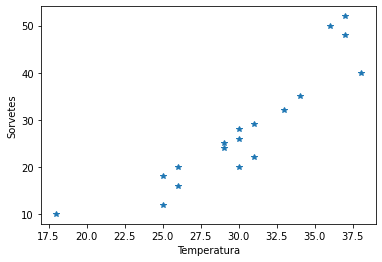

In [8]:
plt.plot(df['temperatura'], df['numero_sorvetes'], '*') #Estilo do gráfico = '*'
plt.xlabel('Temperatura')
plt.ylabel('Sorvetes')
plt.show()

In [9]:
x = df['temperatura'].to_numpy()

In [10]:
y = df['numero_sorvetes'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# define um modelo de regressão
modelo = LinearRegression()

In [15]:
# treina o modelo com os dados de treino
modelo.fit(x_treino.reshape(-1, 1), y_treino.reshape(-1, 1))

LinearRegression()

In [16]:
# y_previsto contém a previsão dos preços do nosso modelo
y_previsto = modelo.predict(x_teste.reshape(-1,1))

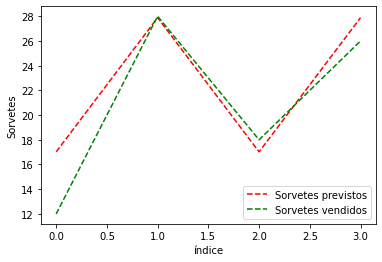

In [17]:
plt.plot(range(y_previsto.shape[0]), y_previsto, 'r--')
plt.plot(range(y_teste.shape[0]), y_teste, 'g--')
plt.legend(['Sorvetes previstos', 'Sorvetes vendidos'])
plt.xlabel('índice')
plt.ylabel('Sorvetes')
plt.show()